In [11]:
from pyuvdata import UVData
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec

In [3]:
uv = UVData()
uv.read('zen.2459122.48015.mini.sum.uvh5')
data = uv.data_array
print('This data array has shape:')
print('(# baselines*times, # spectral windows, # frequencies, # polarizations)')
print(np.shape(data))

This data array has shape:
(# baselines*times, # spectral windows, # frequencies, # polarizations)
(13320, 1, 1536, 1)


In [46]:
# Look at the antennas that are contained in the array:
print(sorted(uv.antenna_numbers))
# Pick 2 sample antennas, and get data from that baseline. Note that to get the 'auto-correlations', you can do the 
# same thing, but set antenna1 and antenna2 to be the same value.
antenna1 = 140
antenna2 = 23
data = uv.get_data(antenna1,antenna2)

[0, 1, 2, 11, 12, 13, 14, 23, 24, 25, 26, 36, 37, 38, 39, 44, 45, 46, 50, 51, 52, 53, 58, 59, 65, 66, 67, 68, 73, 75, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 98, 99, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 116, 117, 118, 119, 120, 121, 122, 123, 124, 127, 128, 129, 130, 135, 136, 137, 138, 140, 141, 142, 143, 144, 145, 155, 156, 157, 158, 160, 161, 162, 163, 164, 165, 166, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


The information in this cell (above) is useful because it produces the numbers for the antennas, and we can see that some antenna numbers are skipped, such as from 3-10, which is useful information to know down the line when we are trying to examine antenna pairs, we need to know which numbered antennas exist, and which do not.

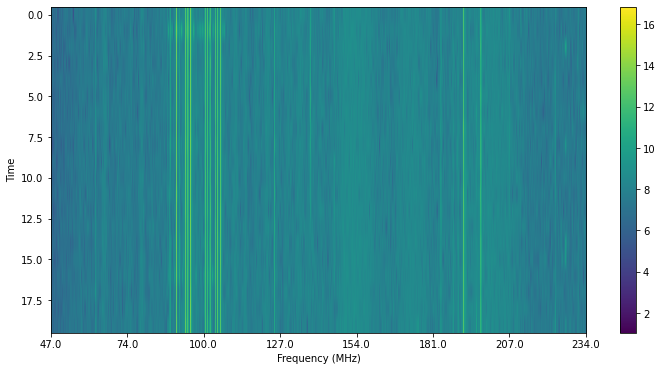

In [48]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.log(np.abs(data)),aspect='auto')
cbar = fig.colorbar(im)
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)


The plot above is a waterfall plot, it shows how visibilities at different frequencies evolve over time. The scale of the visibility data has been set to a logarithmic scale to more clearly show the vertical lines, which represent which frequencies visibilities are strongest at, and differentiate them from the surrounding areas. The y axis also shows that this dataset includes 20 distinct measurements. In other words, during the time interval this data was taken over, each antenna takes 20 measurements. It should be noted that this waterfall plot is only showing data for one antenna pair, namely the (14,14) pair. If we were to look at a different pair of antennas, we would see how the data that other pair gathered changed over time.

Also something to note, the values for the visibilities are recorded as complex numbers. To convert these to real values that can be plotted, we are taking the absolute value of the entire dataset.

In [24]:
freq = uv.freq_array[0]*1e-6
print(len(freq))
antnums = sorted(uv.antenna_numbers)
print(len(antnums))
times = np.unique(uv.time_array)
print(times)
data = uv.get_data((14,14))[0]
print(np.shape(data))

1536
104
[2459122.48009276 2459122.48020461 2459122.48031646 2459122.48042831
 2459122.48054015 2459122.480652   2459122.48076385 2459122.4808757
 2459122.48098755 2459122.4810994  2459122.48121124 2459122.48132309
 2459122.48143494 2459122.48154679 2459122.48165864 2459122.48177048
 2459122.48188233 2459122.48199418 2459122.48210603 2459122.48221788]
(1536,)


Text(0.5, 1.0, 'Antenna 14 autospectra')

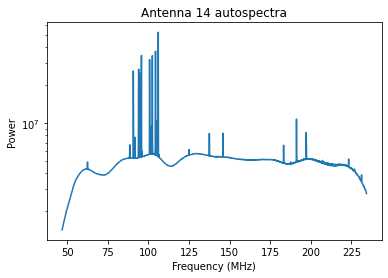

In [25]:
fig = plt.figure()
plt.plot(freq, np.abs(data))
plt.yscale('log')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power')
plt.title('Antenna 14 autospectra')

Text(0.5, 1.0, 'Visibility vs. Frequency, All Antenna Pairs, 20th Measurement')

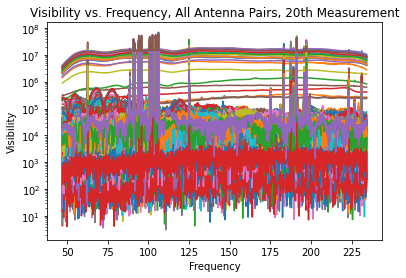

In [56]:
pairs = uv.get_antpairs()
pairs[0][1]

for i in range(666):
    ant1 = pairs[i][0]
    ant2 = pairs[i][1]
    dat = abs(uv.get_data(ant1, ant2))
    plt.yscale('log')
    plt.plot(freqs, dat[19])
plt.yscale('log')
plt.ylabel('Visibility')
plt.xlabel('Frequency')
plt.title('Visibility vs. Frequency, All Antenna Pairs, 20th Measurement')

The plot above, while messy, gives a lot of good information. It presents the visibility vs. frequency data for every antenna pair. Unfortunately, that is a lot of data, and so we can only show the relationship between these two variables for 1 individual measurement, out of the 20 taken, at a time. Above, we are viewing the last of the measurements taken for this dataset, the 20th measurement. What is interesting about this plot is that we can see most of the data for the visibility falls in the 10^3 to 10^5 range, so we can assume that this represents 'sky-like' data. When we look above this range, we start to see some more uniquely shaped data, for example the data that looks vaguely like a periodic sine wave around 10^6, or the functions near the top of the range that look mostly straight.

We can use the information from this plot to look at slices of data in order to find antenna pairs that don't produce the 'sky-like' data. Once we find one of these antenna pairs, we can then further explore the data associated with it to determine why it doesn't look 'sky-like' and to see what other distinguishing features it may have.

So, we have a lot of data to work with here. We have each pair of antennas (666 total pairs) taking 20 visibility measurements in this dataset, which gives a total of 13,320 visibility measurements taken. And each of those visibility measurements contains 1536 values.

With this in mind we should consider what will be the best ways to visually represent the data to look for interesting features/signals, and to identify any problems associated with any antenna(s).
The various plots above have shown how we can plot the data as visibility vs. frequency to look to see at what frequencies we might see something we consider to be signal-like.
We have also shown how we can use a waterfall plot and manipulate the data to show how the data evolves at each frequency over time. These types of plots will be useful because we will be able to see if a problem spontaneously occurs with the data for any antenna pair, or to see if there is a spontaneous event that occurs with the visibility data at a particular frequency for any of the antenna pairs.

Also, we do have millions of visibility values to examine in this dataset alone, but luckily we do not have to look at them all simultaneously. We can take slices of the data to examine for example the visibility data for individual frequencies, or over a shorter time interval.

Finally, it would be useful to note how the data we are looking at is collected. The large number of antennas allow for higher resolution images to be taken over large areas of the sky. The images are created by correlating the signal received from one antenna with the signal received from another. And each antenna correlated its signal with every other antenna in the network. That is why the visibility data we look at has to come from a pair of antennas, it cannot come from a single antenna because the signal must be correlated with another.

In [49]:
print(uv.get_antpairs())

[(1, 1), (1, 14), (1, 23), (1, 26), (1, 36), (1, 50), (1, 53), (1, 58), (1, 59), (1, 65), (1, 66), (1, 68), (1, 75), (1, 82), (1, 83), (1, 84), (1, 85), (1, 90), (1, 91), (1, 93), (1, 98), (1, 99), (1, 100), (1, 102), (1, 104), (1, 117), (1, 118), (1, 120), (1, 122), (1, 124), (1, 135), (1, 140), (1, 141), (1, 142), (1, 176), (2, 1), (2, 2), (2, 14), (2, 23), (2, 26), (2, 36), (2, 50), (2, 53), (2, 58), (2, 59), (2, 65), (2, 66), (2, 68), (2, 75), (2, 82), (2, 83), (2, 84), (2, 85), (2, 90), (2, 91), (2, 93), (2, 98), (2, 99), (2, 100), (2, 102), (2, 104), (2, 117), (2, 118), (2, 120), (2, 122), (2, 124), (2, 135), (2, 140), (2, 141), (2, 142), (2, 176), (14, 14), (14, 23), (14, 26), (14, 36), (14, 50), (14, 53), (14, 58), (14, 59), (14, 65), (14, 66), (14, 68), (14, 75), (14, 82), (14, 83), (14, 84), (14, 85), (14, 90), (14, 91), (14, 93), (14, 98), (14, 99), (14, 100), (14, 102), (14, 104), (14, 117), (14, 118), (14, 120), (14, 122), (14, 124), (14, 135), (14, 140), (14, 141), (14, 1

The cell above, while quite lengthy, gives information for all antenna pairs that exist. A total of 666 pairs.

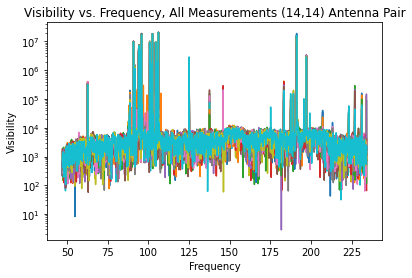

In [57]:
data = abs(data)
for i in range(20):
    plt.plot(freqs,(data[i]))
plt.yscale('log')
plt.ylabel('Visibility')
plt.xlabel('Frequency')
plt.title('Visibility vs. Frequency, All Measurements (14,14) Antenna Pair')
plt.show()

This plot is similar to the waterfall plot. It shows the relationship between the visibility values and the frequency. It creates individual plots of the visibility vs. frequency plots for each of the 20 measurements taken during the time interval for the (14,14) antenna pair measurements, and then overlays them all onto one plot. The plot doesn't quite show how the data evolves over time like the waterfall plot does, but it does show where the data makes consistent measurements, and also shows any regions that gathered unique data. For instance on the above plot in the frequency region from about 80 to 110 MHz, we see greater spikes, which means that data was only collected in one of the 20 measurements taken during the time interval.

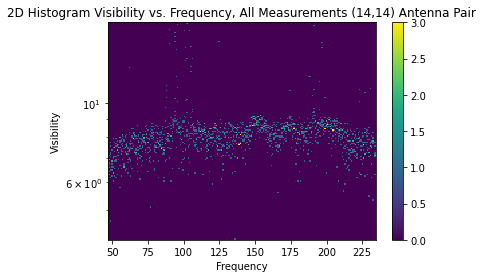

In [55]:
for i in range(20):
    plt.hist2d(freqs,np.log(data[i]), bins = 200)
#plt.yscale('log')
plt.yscale('log')
plt.colorbar()
plt.ylabel('Visibility')
plt.xlabel('Frequency')
plt.title('2D Histogram Visibility vs. Frequency, All Measurements (14,14) Antenna Pair')
plt.show()

The 2D histogram helps to further understand the behavior of the visibility vs. frequency. It also includes all 20 measurements from the (14,14) antenna pair data. We can see here the areas that show up in yellow seem to be consistent throughout all 20 measurements. What we can learn from this histogram however, is that the spikes that show up in the scatterplot two cells above do not appear consistently in all 20 measurements, so we don't really need to worry about what is causing them. Essentially the purpose of the 2D histogram is to help identify what data is consistent, and if the consistent data seems normal, or if it seems like the data is consistently bad.

In [52]:
times = uv.get_times(1,2)
print(len(times))

20
